In [1]:
import sqlite3
import os
import pandas as pd
import re
import numpy as np
from pathlib import Path
from datetime import datetime
from nltk.tag.stanford import StanfordNERTagger
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("worldnews_0619.csv")

In [4]:
df.head()

,body,author,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit
0,Boarders huh,J_Man2743,1559518235,t5_2qh13,t3_a78kyo,t3_a78kyo,0,1568784725,0,0,epuwwc7,worldnews
1,[removed],[deleted],1561011745,t5_2qh13,t3_aeu81p,t1_erl6n3x,0,1570329691,0,0,erm9r84,worldnews
2,I think you know less when you think that Stal...,steeritupld,1560168854,t5_2qh13,t3_andfac,t1_eqmsv60,0,1569348202,0,0,eqmx6le,worldnews
3,So why are you using it as an argument against...,arvada14,1560403679,t5_2qh13,t3_aqio89,t1_eggt2jk,0,1569783807,0,0,eqzooom,worldnews
4,There is no round up ready wheat in the commer...,arvada14,1560400159,t5_2qh13,t3_aqio89,t1_eghowah,0,1569779899,0,0,eqzhngv,worldnews


In [5]:
df["post_date"]=df["created_utc"].apply(lambda x: datetime.fromtimestamp(x))

In [6]:
df.sort_values("post_date").head()

,body,author,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,post_date
796349,Steve Banon\n\nFar right \n\nPick one,edduvald0,1559347202,t5_2qh13,t3_bva42f,t3_bva42f,-2,1568677946,1,0,epom0cg,worldnews,2019-05-31 19:00:02
71160,"I'd really, really love to know another 2020 c...",Theso,1559347204,t5_2qh13,t3_buzs5f,t1_epol158,1,1568677948,0,0,epom0h8,worldnews,2019-05-31 19:00:04
827,Why there is so many racists post today?\n\nBt...,lunetick,1559347205,t5_2qh13,t3_bveiud,t3_bveiud,0,1568677948,1,0,epom0i0,worldnews,2019-05-31 19:00:05
71258,I don't think such a system could act as a det...,cn_cooling,1559347206,t5_2qh13,t3_bv2vmp,t1_epmkbb1,1,1568677949,0,0,epom0j1,worldnews,2019-05-31 19:00:06
456707,environmental destruction/pollution and rampan...,Redditaspropaganda,1559347207,t5_2qh13,t3_bvcfi8,t1_epod8zm,3,1568677950,0,0,epom0ma,worldnews,2019-05-31 19:00:07


Text(0.5, 0.98, 'Number of comments vs Number of Users Who Have Posted that Many Comment')

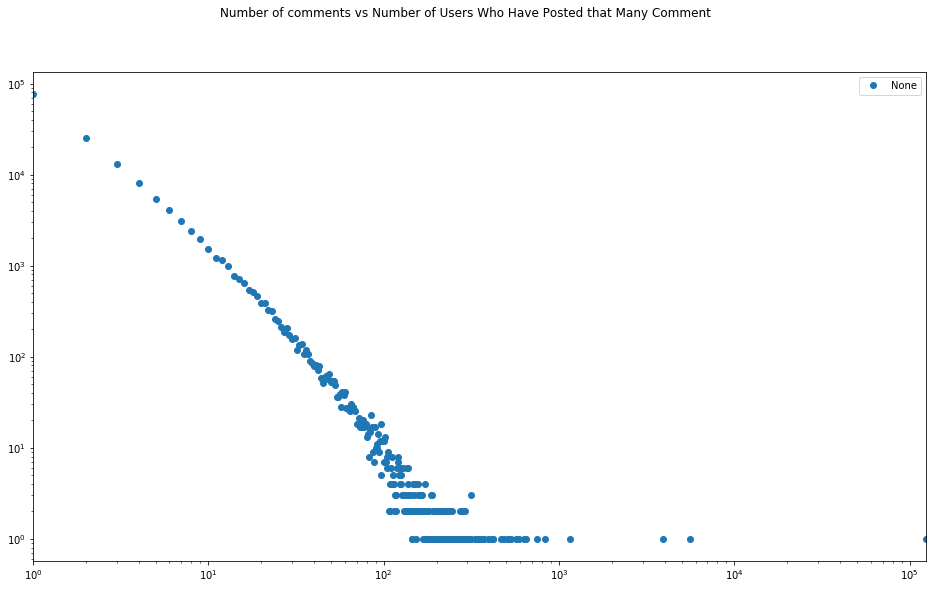

In [8]:
plt1=df.groupby("author").size().sort_values().value_counts().plot(loglog=True, legend=True, style='o',figsize=(16,9))
# pl.axes(xlabel="Number of Comments",ylabel="Number of Users Posting x Comments")
pl.suptitle('Number of comments vs Number of Users Who Have Posted that Many Comment')

In [42]:
df.groupby("author").size().sort_values().value_counts()[0:-1:10]

1      76756
11      1228
20       388
30       155
43        79
50        53
57        28
72        21
86        17
95        12
111        8
136        6
115        4
165        3
116        3
154        2
162        2
118        2
163        2
169        2
268        1
361        1
251        1
181        1
341        1
295        1
192        1
226        1
198        1
dtype: int64

Text(0.5, 0.98, 'Number of comments vs Day of Month')

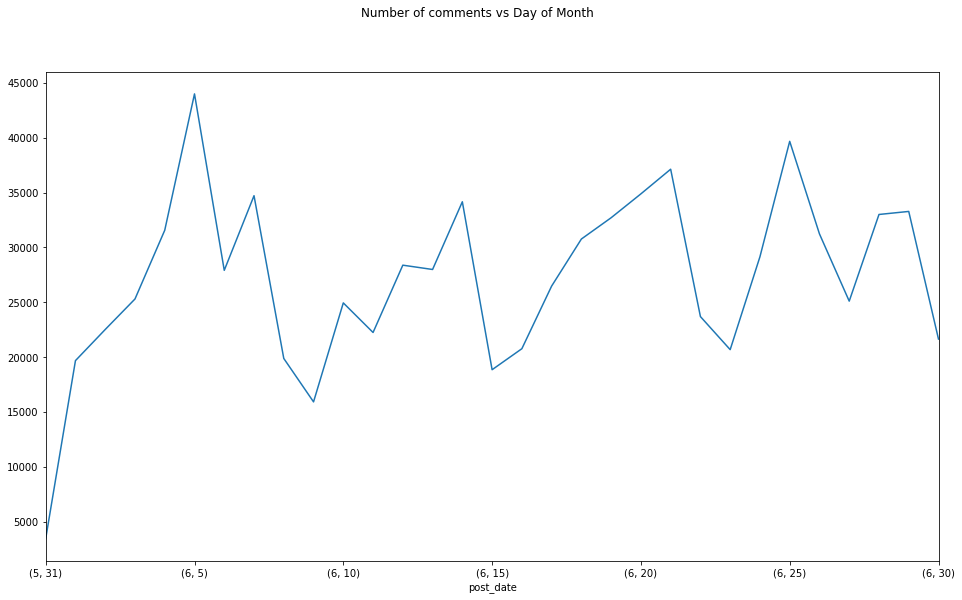

In [124]:
times=pd.to_datetime(df.post_date)
plt2=df.groupby(by=[df.post_date.map(lambda x : (x.month, x.day))]).size().plot(figsize=(16,9))
pl.suptitle('Number of comments vs Day of Month')

In [108]:
frequent_users=df.groupby(by=[df.author,df.post_date.map(lambda x : (x.month, x.day))]).agg('count')[df.groupby(["author",df.post_date.map(lambda x : (x.month, x.day))]).agg('count')["body"]>1]
frequent_users[1:15]

body  created_utc  subreddit_id  link_id  \
author               post_date                                             
---Ocelot---         (6, 5)        5            5             5        5   
                     (6, 6)        3            3             3        3   
                     (6, 8)        3            3             3        3   
                     (6, 21)       2            2             2        2   
---TheFierceDeity--- (6, 19)       3            3             3        3   
--Captain__America-- (6, 6)        2            2             2        2   
                     (6, 12)       4            4             4        4   
                     (6, 14)       7            7             7        7   
                     (6, 15)       6            6             6        6   
                     (6, 16)       2            2             2        2   
                     (6, 25)       3            3             3        3   
--ManBearPig--       (6, 1)        2            2             2        2   
                     (6, 11)       5            5             5        5   
                     (6, 20)       5            5             5        5   

                                parent_id  score  retrieved_on  \
author               post_date                                   
---Ocelot---         (6, 5)             5      5             5   
                     (6, 6)             3      3             3   
                     (6, 8)             3      3             3   
                     (6, 21)            2      2             2   
---TheFierceDeity--- (6, 19)            3      3             3   
--Captain__America-- (6, 6)             2      2             2   
                     (6, 12)            4      4             4   
                     (6, 14)            7      7             7   
                     (6, 15)            6      6             6   
                     (6, 16)            2      2             2   
                     (6, 25)            3      3             3   
--ManBearPig--       (6, 1)             2      2             2   
                     (6, 11)            5      5             5   
                     (6, 20)            5      5             5   

                                controversiality  gilded  id  subreddit  \
author               post_date                                            
---Ocelot---         (6, 5)                    5       5   5          5   
                     (6, 6)                    3       3   3          3   
                     (6, 8)                    3       3   3          3   
                     (6, 21)                   2       2   2          2   
---TheFierceDeity--- (6, 19)                   3       3   3          3   
--Captain__America-- (6, 6)                    2       2   2          2   
                     (6, 12)                   4       4   4          4   
                     (6, 14)                   7       7   7          7   
                     (6, 15)                   6       6   6          6   
                     (6, 16)                   2       2   2          2   
                     (6, 25)                   3       3   3          3   
--ManBearPig--       (6, 1)                    2       2   2          2   
                     (6, 11)                   5       5   5          5   
                     (6, 20)                   5       5   5          5   

                                post_date  
author               post_date             
---Ocelot---         (6, 5)             5  
                     (6, 6)             3  
                     (6, 8)             3  
                     (6, 21)            2  
---TheFierceDeity--- (6, 19)            3  
--Captain__America-- (6, 6)             2  
                     (6, 12)            4  
                     (6, 14)            7  
                     (6, 15)            6  
                     (6, 16)            2  
                     (6, 25) 

Text(0.5, 0.98, 'Average Number of comments vs Day of Month for Regular Users')

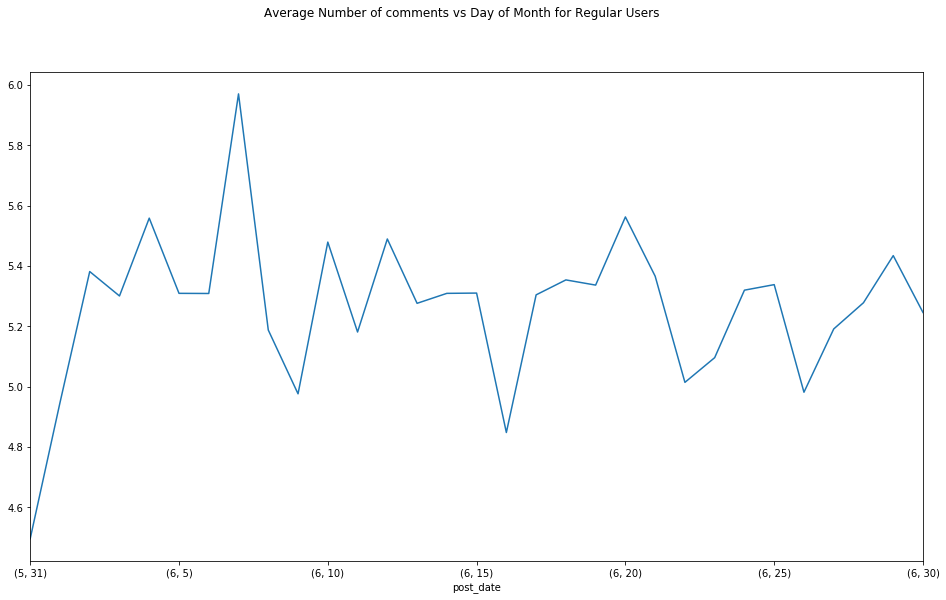

In [126]:
frequent_users.body.unstack().mean().plot(figsize=(16,9))
pl.suptitle('Average Number of comments vs Day of Month for Regular Users')